# Harmonic Coefficient Calculator
#### by Elizabeth Barnes

An illustration how to use our regression equations to calculate the harmonic coefficients (Fourier coefficients).

In [ ]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

import importlib

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

### Get your data together

In [ ]:
# Define the window size (10.1) and sampling rate (0.1)
T = 10.1
t = np.arange(0.,T,.1)
N = np.size(t)-1

max_coeffs = 7

Now we are going to make-up our data. To do this, we are going to combine sines and cosines of varying amplitudes and wavelengths to make a final "time series" called y. 

In [ ]:
A1 = 8.
A3 = 10.
B2 = 7.

#for plotting purposes later - put this information into arrays
A_actual = np.zeros(max_coeffs)
B_actual = np.zeros(max_coeffs)

A_actual[1-1] = A1
A_actual[3-1] = A3
B_actual[2-1] = B2


y = A1*np.cos(2.*np.pi*1.*t/T) + A3*np.cos(2.*np.pi*3.*t/T) + B2*np.sin(2.*np.pi*2.*t/T)

Now let's plot the resulting time series. _Remember_: we know y exactly, and we know how much of wavenumber k=1 cosine is in there (i.e. A1 = 8), how much of wavenumber k=2 sine is in there (i.e. B2 = 7), etc.

In [ ]:
plt.figure()
plt.plot(t,y,'--k',linewidth = 5, label = 'original data')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.xlabel('time')
plt.ylabel('wave amplitude')
plt.show()

### Calculate the harmonic coefficients

Like with so many examples in this class, we are now going to pretend that we don't know how y was made. We are then going to use our regression techniques discussed in class to try and calculate the amounts of each cosine/sine function that was used to make y. Since we know the true answer, we can check and see how our harmonic coefficient calculator did.

Step 1 is to initialize our cosine amplitude (A_guess) and sine ampitude (B_guess) arrays. For now, the maximum number of coefficients we will calculate are up to wavenumber 7 - but this can of course be changed very easily.

In [ ]:
A_guess = np.zeros(max_coeffs)
B_guess = np.zeros(max_coeffs)

This is the set of lines where the "magic" happens. We use our regression coefficient relationships to estimate the A's and B's. It is really just a loop with two lines of code - one for the cosine coefficients (A_guess) and the other for the sine coefficients (B_guess). Easy!

In [ ]:
for k in np.arange(1,max_coeffs,1):
   
    A_guess[k-1] = 2.*np.mean(np.cos(2.*np.pi*k*t/T) * y)
    B_guess[k-1] = 2.*np.mean(np.sin(2.*np.pi*k*t/T) * y)

print('A_guess = ' + str(A_guess))
print('B_guess = ' + str(B_guess))    

Now - let's compare our estimated coefficients with the actual coefficients. First for the cosine terms, then the sine terms.

In [ ]:
bar_width = .35
plt.figure()

plt.bar(np.arange(max_coeffs)+1, A_actual, bar_width, color = 'gray', label = 'A_actual')
plt.bar(np.arange(max_coeffs)+bar_width+1, A_guess, bar_width, color = 'cornflowerblue', label = 'A_guess')

plt.title('Cosine Coefficients')
plt.xlabel('wavenumber')
plt.ylabel('coefficient/amplitude')

plt.legend()

plt.show()

In [ ]:
plt.figure()

plt.bar(np.arange(max_coeffs)+1, B_actual, bar_width, color = 'gray', label = 'B_actual')
plt.bar(np.arange(max_coeffs)+bar_width+1, B_guess, bar_width, color = 'darkorange', label = 'B_guess')

plt.title('Sine Coefficients')
plt.xlabel('wavenumber')
plt.ylabel('coefficient/amplitude')

plt.legend()

plt.show()

Wow! You can see we did a perfect job - reconstructing our data from bits of sines and cosines. This is a Fourier decomposition!!

### Putting the pieces back together

To totally convince you that our coefficient calculator did a good job, let's plot the different contributors to our curve using our estimated coefficients for each term.

In [ ]:
plt.figure()
plt.plot(t,y,'--k',linewidth = 5, label = 'original data')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.xlabel('time')
plt.ylabel('wave amplitude')

plt.plot(t,A_guess[1-1]*np.cos(2.*np.pi*1.*t/T),'-', color = 'gray')
plt.plot(t,A_guess[3-1]*np.cos(2.*np.pi*3.*t/T),'-',color = 'gray')
plt.plot(t,B_guess[2-1]*np.sin(2.*np.pi*2.*t/T),'-', color = 'gray')

#plt.legend(frameon = False, loc = 'lower right', fontsize = 8)
#plt.title('components of y in terms of harmonics')

plt.show()

Finally, we can add-up all of these contributions (gray curves above) and see what our reconstructed time series looks like (this is the red line plotted below).

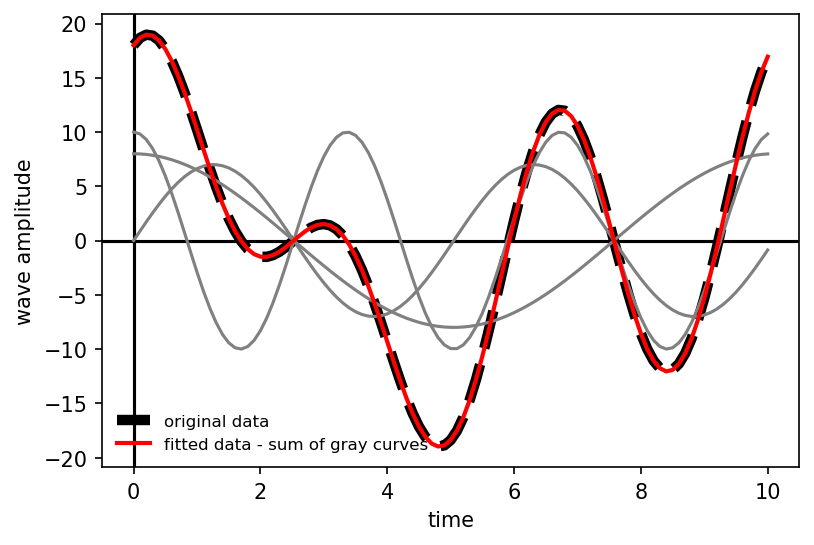

In [16]:
plt.figure()
plt.plot(t,y,'--k',linewidth = 5, label = 'original data')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.xlabel('time')
plt.ylabel('wave amplitude')

plt.plot(t,A_guess[1-1]*np.cos(2.*np.pi*1.*t/T),'-', color = 'gray')
plt.plot(t,A_guess[3-1]*np.cos(2.*np.pi*3.*t/T),'-',color = 'gray')
plt.plot(t,B_guess[2-1]*np.sin(2.*np.pi*2.*t/T),'-', color = 'gray')

y_guess = A_guess[1-1] * np.cos(2.*np.pi*1.*t/T) + A_guess[3-1] * np.cos(2.*np.pi*3.*t/T) + B_guess[2-1] * np.sin(2.*np.pi*2.*t/T)
plt.plot(t,y_guess,'-',color = 'red', linewidth = 2, label = 'fitted data - sum of gray curves')
plt.legend(frameon = False, loc = 'lower left', fontsize = 8)

plt.show()

Now you should be impressed. It worked! We got back our original data (black curve) exactly using the sum of the gray curves, where the "amount" of each gray curve was determined by our harmonic coefficient calculator, or a.k.a., our Fourier decomposition via regression!

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/example_harmonic_coefficient_calculator.ipynb*